<a href="https://colab.research.google.com/github/Charles20239/Credit_Card_Default_Prediction/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)

In [6]:
# show data
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# adjust "EDUCATION" column
data["EDUCATION"] = data["EDUCATION"].replace({0:4, 5:4 ,6:4})
# adjust "MARRIAGE" column
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})

In [8]:
# show data information
data.shape

(30000, 25)

**Data process finished!**

**Start training model!**

In [9]:
from sklearn.model_selection import train_test_split

# split data into features (X) and target (Y)
X = data.drop(["ID","default payment next month"],axis = 1)  # exclude the last column (the target) and the first two rows (header)
Y = data["default payment next month"]  # last column is the target variable

# split data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((21000, 23), (9000, 23), (21000,), (9000,))

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train model with unbalanced data**

In [12]:

from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# train model on training data
rf.fit(X_train_scaled, Y_train);


In [13]:
# make prediction on test data
Y_pred = rf.predict(X_test_scaled)

In [14]:
from sklearn.metrics import classification_report

# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.37      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



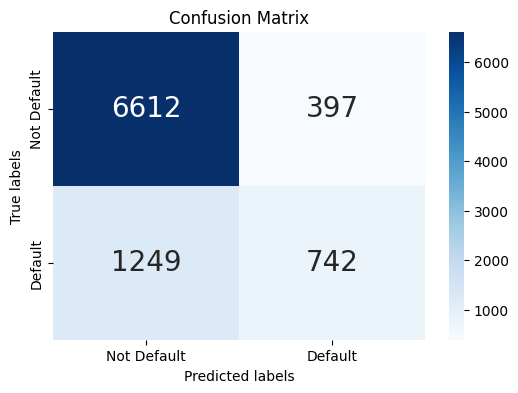

In [15]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Train model with balanced data**

In [ ]:
# balance the data, create two data type
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
rf.fit(X_resampled, Y_resampled);

In [ ]:
Y_pred = rf.predict(X_test_scaled)

In [ ]:
# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7009
           1       0.55      0.47      0.51      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.68      0.69      9000
weighted avg       0.79      0.80      0.79      9000



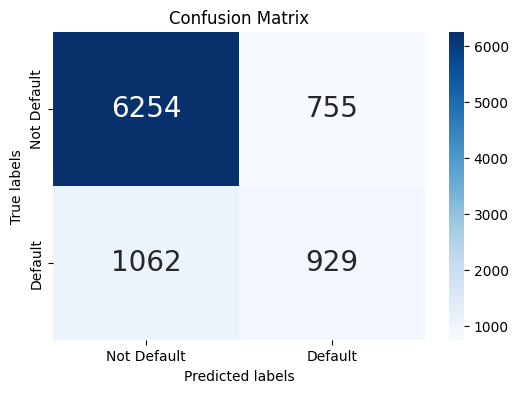

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Model with Cross-Validation(unbalanced data)**

In [ ]:
from sklearn.model_selection import GridSearchCV

# define parameters need to be tested
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}]
}

In [ ]:
# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# start grid search
grid_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=2)

In [ ]:
# show best parameters
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Best Score: 0.8217142857142857


In [ ]:
# use best parameters to train model
best_model = RandomForestClassifier(**best_parameters)
best_model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=300)

In [ ]:
# use best parameters to predict model
Y_pred_RFgrid = best_model.predict(X_test_scaled)

In [ ]:
# show performance
class_report = classification_report(Y_test, Y_pred_RFgrid)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



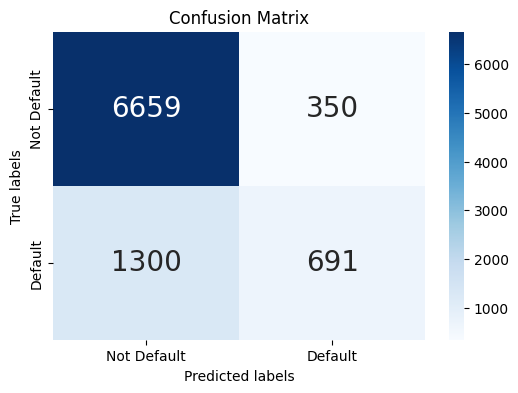

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_RFgrid)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Model with Cross-Validation(balanced data)**

In [ ]:
X_grid_balan = X_resampled
Y_grid_balan = Y_resampled

In [ ]:
# start grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_grid_balan, Y_grid_balan)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=2)

In [ ]:
# show best parameters
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'class_weight': None, 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 300}
Best Score: 0.861449098135127


In [ ]:
# use best parameters to train model
best_model = RandomForestClassifier(**best_parameters)
best_model.fit(X_grid_balan, Y_grid_balan)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=50, max_features='auto', n_estimators=300)

In [ ]:
# use best parameters to predict model
Y_pred_RFgrid_ba = best_model.predict(X_test_scaled)

In [ ]:
# show performance
class_report = classification_report(Y_test, Y_pred_RFgrid_ba)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7009
           1       0.55      0.46      0.50      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.68      0.69      9000
weighted avg       0.79      0.80      0.79      9000



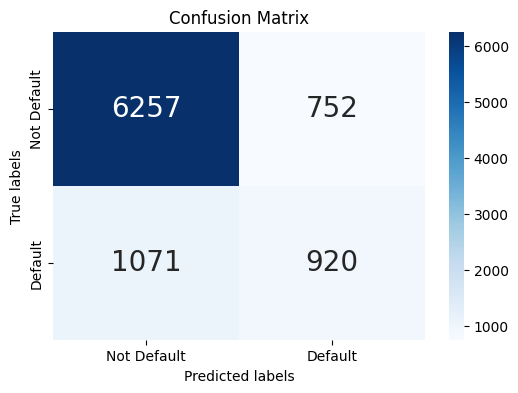

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_RFgrid_ba)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Result with unbalanced data**

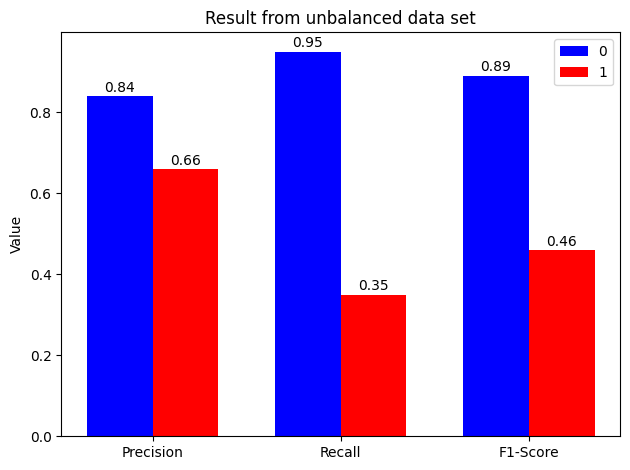

In [16]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.84, 0.95, 0.89]
group2_data = [0.66, 0.35, 0.46]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from unbalanced data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Result with balanced data**

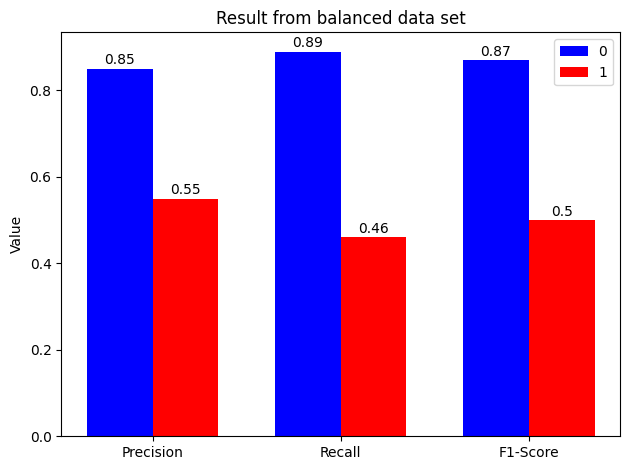

In [17]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.85, 0.89, 0.87]
group2_data = [0.55, 0.46, 0.50]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from balanced data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Other result include macro average and weighted average**

**Macro average**

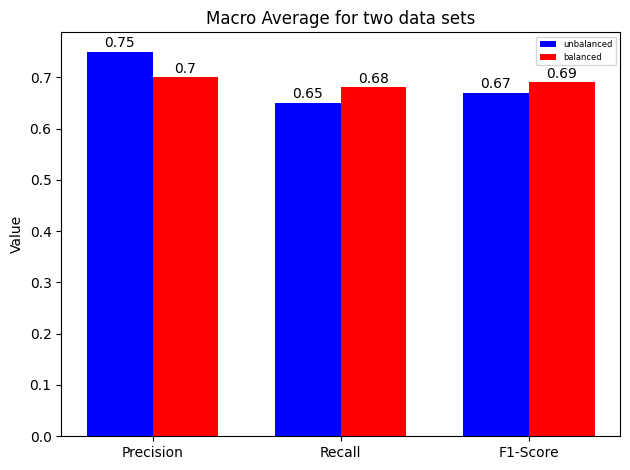

In [19]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.75, 0.65, 0.67]
group2_data = [0.70, 0.68, 0.69]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Macro Average for two data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Weighted Average**

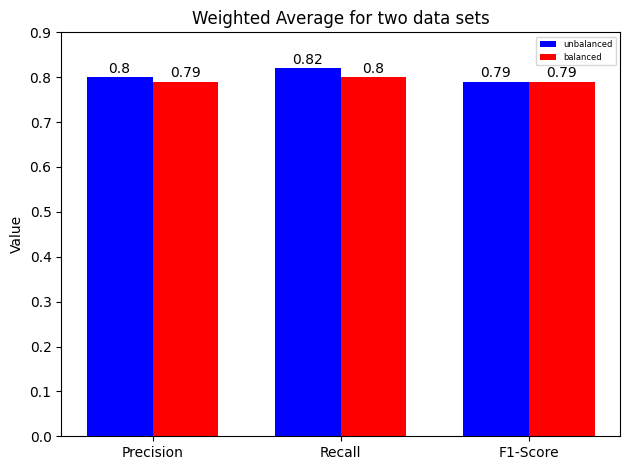

In [21]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.80, 0.82, 0.79]
group2_data = [0.79, 0.80, 0.79]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Weighted Average for two data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim((0.0,0.9))
plt.show()
